In [1]:
import numpy as np
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
#matplotlib.rc('font', **font)
cstring = 'rgbcmyk'
import matplotlib as ml
%matplotlib inline
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 16}
ml.rc('font', **font)
ml.rcParams['figure.figsize'] = (8.0, 5.0)
ml.rcParams['text.usetex'] =True
ml.rc('font', family='serif',size=22)

In [55]:
g0 = 3100
g1 = 380
g3 = 290
g4 = 141
g2 = -15
g5 = 50
Dt2 = -2.3
Dt3=0.0
Dt4=0.0
Dtp = 10.5

In [56]:
def getBMatrixAB(kx, ky, Dt, mu, xi):
    v0 = -0.5 * np.sqrt(3) * g0
    v3 = -0.5 * np.sqrt(3) * g3
    v4 = -0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    p = xi * kx + ky * 1j
    pc = xi * kx - ky * 1j
    idt = np.ones(kx.shape, dtype=float)
    Hl = np.array([[(Dt - mu)*idt, v0*pc, -v4*pc, -v3*p],
                   [v0*p, (Dt + Dtp - mu)*idt, g1*idt, -v4*pc],
                   [-v4*p, g1*idt, (-Dt + Dtp - mu)*idt, v0*pc],
                   [-v3*pc, -v4 * p, v0*p, (-Dt - mu)*idt]])
    return np.moveaxis(Hl, [0,1], [-2,-1])


def getBMatrixABA(kx, ky, Dt, mu, xi):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    p = xi * kx + ky * 1j
    pc = xi * kx - ky * 1j
    idt = np.ones(kx.shape, dtype=float)
    Hl = np.array([[(Dt + Dt2 - mu)*idt, v0*pc, -v4*pc, -v3*p, 0.5*g2*idt, 0*idt],
                   [v0*p, (Dt + Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0.5*g5*idt],
                   [-v4*p, g1*idt, (-2*Dt2 + Dtp - mu)*idt, v0*pc, -v4*p, g1*idt],
                   [-v3*pc, -v4 * p, v0*p, (-2*Dt2 - mu)*idt, -v3*pc, -v4*p],
                   [0.5*g2*idt, 0*idt, -v4*pc, -v3*p,(Dt2 - Dt - mu)*idt, v0*pc],
                   [0*idt, 0.5*g5*idt, g1*idt, -v4*pc, v0*p, (Dt2 - Dt + Dtp - mu)*idt]])
    return np.moveaxis(Hl, [0,1], [-2,-1])

def getBMatrixABAB(kx, ky, Dt, mu, xi):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    p = xi * kx + ky * 1j
    pc = xi * kx - ky * 1j
    idt = np.ones(kx.shape, dtype=float)
    Dt2 = 0
    Hl = np.array([[(Dt + Dt2 - mu)*idt, v0*pc, -v4*pc, -v3*p, 0.5*g2*idt, 0*idt, 0*idt, 0*idt],
                   [v0*p, (Dt + Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0.5*g5*idt, 0*idt, 0*idt],
                   [-v4*p, g1*idt, (Dt/3 - Dt3 - Dt2 + Dtp - mu)*idt, v0*pc, -v4*p, g1*idt, 0.5*g5*idt, 0*idt],
                   [-v3*pc, -v4 * p, v0*p, (Dt/3 - Dt3 - Dt2 - mu)*idt, -v3*pc, -v4*p, 0*idt, 0.5*g2*idt],
                   [0.5*g2*idt, 0*idt, -v4*pc, -v3*p,(-Dt/3 + Dt3 - Dt2 - mu)*idt, v0*pc, -v4*pc, -v3*p],
                   [0*idt, 0.5*g5*idt, g1*idt, -v4*pc, v0*p, (-Dt/3 + Dt3 - Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc],
                   [0*idt, 0*idt, 0.5*g5*idt, 0*idt, -v4*p, g1*idt, (Dt2 - Dt + Dtp - mu)*idt, v0*pc],
                   [0*idt, 0*idt, 0*idt, 0.5*g2*idt, -v3*pc, -v4*p, v0*p, (Dt2 - Dt - mu)*idt]])
    return np.moveaxis(Hl, [0,1], [-2,-1])


def getBMatrixABAC(kx, ky, Dt, mu, xi):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    p = xi * kx + ky * 1j
    pc = xi * kx - ky * 1j
    idt = np.ones(kx.shape, dtype=float)
    Dt2 = 0
    Hl = np.array([[(Dt + Dt2 - mu)*idt, v0*pc, -v4*pc, -v3*p, 0.5*g2*idt, 0*idt, 0*idt, 0*idt],
                   [v0*p, (Dt + Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0.5*g5*idt, 0*idt, 0*idt],
                   [-v4*p, g1*idt, (Dt/3 - Dt3 - Dt2 + Dtp - mu)*idt, v0*pc, -v4*p, g1*idt, 0*idt, 0*idt],
                   [-v3*pc, -v4 * p, v0*p, (Dt/3 - Dt3 - Dt2 - mu)*idt, -v3*pc, -v4*p, 0.5*g2*idt, 0*idt],
                   [0.5*g2*idt, 0*idt, -v4*pc, -v3*p,(-Dt/3 + Dt3 - Dt2 + Dtp - mu)*idt, v0*pc, -v4*p, g1*idt],
                   [0*idt, 0.5*g5*idt, g1*idt, -v4*pc, v0*p, (-Dt/3 + Dt3 - Dt2 + Dtp - mu)*idt, -v3*pc, -v4*p],
                   [0*idt, 0*idt, 0*idt, 0.5*g2*idt, -v4*pc, -v3*p, (Dt2 - Dt - mu)*idt, v0*pc],
                   [0*idt, 0*idt, 0*idt, 0*idt, g1*idt, -v4*pc, v0*p, (Dt2 - Dt + Dtp - mu)*idt]])
    return np.moveaxis(Hl, [0,1], [-2,-1])

def getBMatrixABC(kx, ky, Dt, mu, xi):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    p = xi * kx + ky * 1j
    pc = xi * kx - ky * 1j
    idt = np.ones(kx.shape, dtype=float)
    Hl = np.array([[(Dt + Dt2 - mu)*idt, v0*pc, -v4*pc, -v3*p, 0*idt, 0.5*g2*idt],
                   [v0*p, (Dt + Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0*idt],
                   [-v4*p, g1*idt, (-2*Dt2 + Dtp - mu)*idt, v0*pc, -v4*pc, -v3*p],
                   [-v3*pc, -v4 * p, v0*p, (-2*Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc],
                   [0*idt, 0*idt, -v4*p, g1*idt,(Dt2 - Dt + Dtp - mu)*idt, v0*pc],
                   [0.5*g2*idt, 0*idt, -v3*pc, -v4*p, v0*p, (Dt2 - Dt - mu)*idt]])
    return np.moveaxis(Hl, [0,1], [-2,-1])

def getBMatrixABCA(kx, ky, Dt, mu, xi):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    p =  xi * kx + ky * 1j
    pc = xi * kx - ky * 1j
    Dt2=0
    idt = np.ones(kx.shape, dtype=float)
    Hl = np.array([[(Dt + Dt2 - mu)*idt, v0*pc, -v4*pc, -v3*p, 0*idt, 0.5*g2*idt, 0*idt, 0*idt],
                   [v0*p, (Dt + Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0*idt, 0*idt, 0*idt],
                   [-v4*p, g1*idt, (Dt/3 - Dt3 - Dt2 + Dtp - mu)*idt, v0*pc, -v4*pc, -v3*p, 0*idt, 0.5*g2*idt],
                   [-v3*pc, -v4 * p, v0*p, (Dt/3 - Dt3 - Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0*idt],
                   [0*idt, 0*idt, -v4*p, g1*idt,(-Dt/3 + Dt3 - Dt2 + Dtp - mu)*idt, v0*pc, -v4*pc, -v3*p],
                   [0.5*g2*idt, 0*idt, -v3*pc, -v4*p, v0*p, (-Dt/3 + Dt3 - Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc],
                   [0*idt, 0*idt, 0*idt, 0*idt, -v4*p, g1*idt, (Dt2 - Dt + Dtp - mu)*idt, v0*pc],
                   [0*idt, 0*idt, 0.5*g2*idt, 0*idt, -v3*pc, -v4*p, v0*p, (Dt2 - Dt - mu)*idt]])
    return np.moveaxis(Hl, [0,1], [-2,-1])

In [57]:
def getBMatrixABABA(kx, ky, Dt, mu, xi):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    p = xi * kx + ky * 1j
    pc = xi * kx - ky * 1j
    idt = np.ones(kx.shape, dtype=float)
    Dt2 = 0
    Hl = np.array([[(Dt + 2*Dt2 - Dt4 - mu)*idt, v0*pc, -v4*pc, -v3*p, 0.5*g2*idt, 0*idt, 0*idt, 0*idt, 0*idt, 0*idt],
                   [v0*p, (Dt + 2*Dt2 - Dt4 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0.5*g5*idt, 0*idt, 0*idt, 0*idt, 0*idt],
                   [-v4*p, g1*idt, (Dt/2 - Dt2 - Dt3 - Dt4 + Dtp - mu)*idt, v0*pc, -v4*p, g1*idt, 0.5*g5*idt, 0*idt, 0*idt, 0*idt],
                   [-v3*pc, -v4*p, v0*p, (Dt/2 - Dt2 - Dt3 - Dt4 - mu)*idt, -v3*pc, -v4*p, 0*idt, 0.5*g2*idt, 0*idt, 0*idt],
                   [0.5*g2*idt, 0*idt, -v4*pc, -v3*p,(-2*Dt2 + 4*Dt4 - mu)*idt, v0*pc, -v4*pc, -v3*p, 0.5*g2*idt, 0*idt],
                   [0*idt, 0.5*g5*idt, g1*idt, -v4*pc, v0*p, (-2*Dt2 + 4*Dt4 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0.5*g5*idt],
                   [0*idt, 0*idt, 0.5*g5*idt, 0*idt, -v4*p, g1*idt, (-Dt/2 - Dt2 + Dt3 - Dt4 + Dtp - mu)*idt, v0*pc, -v4*p, g1*idt],
                   [0*idt, 0*idt, 0*idt, 0.5*g2*idt, -v3*pc, -v4*p, v0*p, (-Dt/2 - Dt2 + Dt3 - Dt4 - mu)*idt, -v3*pc, -v4*p],
                   [0*idt, 0*idt, 0*idt, 0*idt, 0.5*g2*idt, 0*idt, -v4*pc, -v3*p, (-Dt + 2*Dt2 - Dt4 - mu)*idt, v0*pc],
                   [0*idt, 0*idt, 0*idt, 0*idt, 0*idt, 0.5*g5*idt, g1*idt, -v4*pc, v0*p, (-Dt + 2*Dt2 - Dt4 + Dtp - mu)*idt]])
    return np.moveaxis(Hl, [0,1], [-2,-1])

def getBMatrixABCAB(kx, ky, Dt, mu, xi):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    p =  xi * kx + ky * 1j
    pc = xi * kx - ky * 1j
    Dt2=0
    idt = np.ones(kx.shape, dtype=float)
    Hl = np.array([[(Dt + 2*Dt2 - Dt4 - mu)*idt, v0*pc, -v4*pc, -v3*p, 0*idt, 0.5*g2*idt, 0*idt, 0*idt, 0*idt, 0*idt],
                   [v0*p, (Dt + 2*Dt2 - Dt4 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0*idt, 0*idt, 0*idt, 0*idt, 0*idt],
                   [-v4*p, g1*idt, (Dt/2 - Dt2 - Dt3 - Dt4 + Dtp - mu)*idt, v0*pc, -v4*pc, -v3*p, 0*idt, 0.5*g2*idt, 0*idt, 0*idt],
                   [-v3*pc, -v4*p, v0*p, (Dt/2 - Dt2 - Dt3 - Dt4 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0*idt, 0*idt, 0*idt],
                   [0*idt, 0*idt, -v4*p, g1*idt,(-2*Dt2 + 4*Dt4 + Dtp - mu)*idt, v0*pc, -v4*pc, -v3*p, 0*idt, 0.5*g2*idt],
                   [0.5*g2*idt, 0*idt, -v3*pc, -v4*p, v0*p, (-2*Dt2 + 4*Dt4 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0*idt],
                   [0*idt, 0*idt, 0*idt, 0*idt, -v4*p, g1*idt, (-Dt/2 - Dt2 + Dt3 - Dt4 + Dtp - mu)*idt, v0*pc, -v4*pc, -v3*p],
                   [0*idt, 0*idt, 0.5*g2*idt, 0*idt, -v3*pc, -v4*p, v0*p, (-Dt/2 - Dt2 + Dt3 - Dt4 + Dtp - mu)*idt, g1*idt, -v4*pc],
                   [0*idt, 0*idt, 0*idt, 0*idt, 0*idt, 0*idt, -v4*p, g1*idt, (-Dt + 2*Dt2 - Dt4 + Dtp - mu)*idt, v0*pc],
                   [0*idt, 0*idt, 0*idt, 0*idt, 0.5*g2*idt, 0*idt, -v3*pc, -v4*p, v0*p, (-Dt + 2*Dt2 - Dt4 - mu)*idt]])
    return np.moveaxis(Hl, [0,1], [-2,-1])

In [58]:
def fsysSel(name):
    if name == "AB":
        return getBMatrixAB
    elif name == "ABA":
        return getBMatrixABA
    elif name == "ABAB":
        return getBMatrixABAB
    elif name == "ABAC":
        return getBMatrixABAC
    elif name == "ABC":
        return getBMatrixABC
    elif name == "ABCA":
        return getBMatrixABCA
    elif name == "ABCAB":
        return getBMatrixABCAB
    elif name == "ABABA":
        return getBMatrixABABA
    else:
        return None 

In [59]:
np.linalg.eigh(getBMatrixABCAB(-0.0002, 0.000346410161513, 30, 0.0, 1))[0]

array([-392.42611866, -377.1431784 , -362.15924648, -346.7645068 ,
        -29.9775671 ,   29.9867435 ,  367.77082622,  383.15459938,
        398.13959701,  413.41885132])

## Code for doing 1D plot

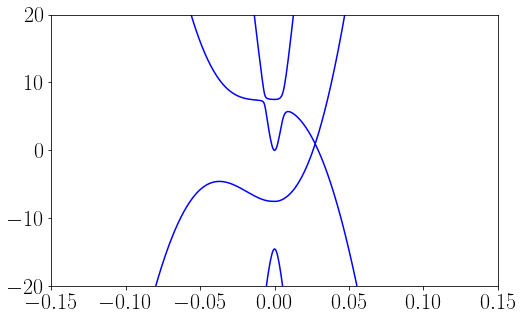

In [60]:
Delta = 0
System = "ABAC"
kx=np.linspace(-0.15,0.15,600)
ky=np.zeros(kx.shape)
w,_=np.linalg.eigh(fsysSel(System)(kx, ky, Delta, 0.0, 1))
ml.rcParams['figure.figsize'] = (8.0, 5.0)
plt.plot(kx,w,'b')
plt.ylim([-20,20])
plt.xlim([-0.15,0.15])
plt.show()

## Comparing two systems in 1D plot

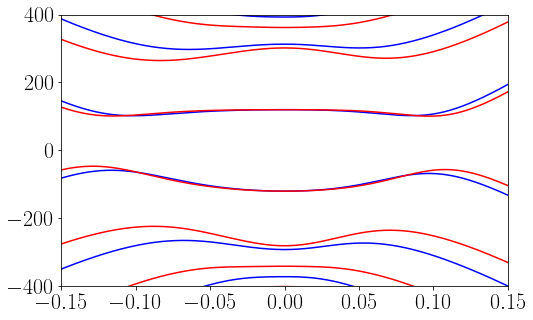

In [11]:
Delta = 120
System1 = "ABCA"
System2 = "ABCAB"
kx=np.linspace(-0.15,0.15,600)
ky=np.zeros(kx.shape)
w1,_=np.linalg.eigh(fsysSel(System1)(kx, ky, Delta, 0.0, 1))
w2,_=np.linalg.eigh(fsysSel(System2)(kx, ky, Delta, 0.0, 1))
ml.rcParams['figure.figsize'] = (8.0, 5.0)
plt.plot(kx,w1,'b')
plt.plot(kx,w2,'r')
plt.ylim([-400,400])
plt.xlim([-0.15,0.15])
plt.show()

## Code for getting Fermi surfaces

In [31]:
Delta = 20
System = "ABCA"
Nl = len(System)
kr = np.linspace(-0.15,0.15, 600)
KX, KY = np.meshgrid(kr, kr)
w, v = np.linalg.eigh(fsysSel(System)(KX, KY, Delta, 0.0, 1))

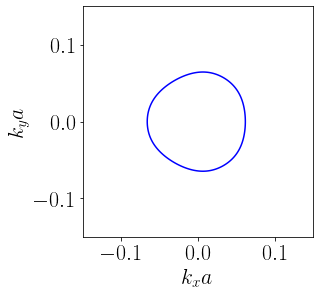

In [32]:
mu = 30
ml.rcParams['figure.figsize'] = (5.0, 5.0)
ml.rcParams['contour.negative_linestyle']= 'solid'
fig, ax= plt.subplots(1,1)
if np.any(w[:,:,Nl]<mu):
    ax.contour(KX, KY, w[:,:,Nl],[mu],colors='b')
if np.any(w[:,:,Nl+1]<mu):
    ax.contour(KX, KY, w[:,:,Nl+1],[mu],colors='r')
if np.any(w[:,:,Nl-1]>mu):
    ax.contour(KX, KY, w[:,:,Nl-1],[mu],colors='k')
if np.any(w[:,:,Nl-2]>mu):
    ax.contour(KX, KY, w[:,:,Nl-2],[mu],colors='g')
ax.set_xlim([-0.15,0.15])
ax.set_ylim([-0.15,0.15])
ax.set_xlabel(r'$k_xa$')
ax.set_ylabel(r'$k_ya$')
ax.set(adjustable='box', aspect='equal')
plt.tight_layout()
plt.show()